In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

col_names = data.feature_names

In [3]:
X[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [4]:
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
col_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Q1. Split the dataset into training set and test set (80, 20).

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)

### Q2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
predict = dtc.predict(X_test)

Td = dtc.get_depth()
print("Depth of the classifier: ", Td)
print("Number of leaves in the classifier: ", dtc.get_n_leaves())
feature_importances = dtc.tree_.compute_feature_importances(normalize=False)
print("Feature importance for the classifier: ", str(feature_importances)) 

Depth of the classifier:  7
Number of leaves in the classifier:  21
Feature importance for the classifier:  [0.         0.01098901 0.         0.         0.0043956  0.
 0.         0.0364979  0.003663   0.         0.         0.
 0.00832591 0.00211506 0.00068266 0.         0.         0.01333839
 0.         0.00424791 0.         0.00544723 0.33716141 0.
 0.01072882 0.         0.0043061  0.02503976 0.         0.        ]


### Q3. Similarly as in previous step, train another Decision Tree Classifier - but in this case set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and test set as you used for the Decision Tree in the previous step.

In [8]:
dtc1 = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
predict1 = dtc1.predict(X_test)

Td = dtc1.get_depth()
print("Depth of the classifier: ", Td)
print("Number of leaves in the classifier: ", dtc1.get_n_leaves()) 
feature_importances1 = dtc1.tree_.compute_feature_importances(normalize=False)
print("Feature importance for the classifier: ", str(feature_importances1)) 

Depth of the classifier:  1
Number of leaves in the classifier:  2
Feature importance for the classifier:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33166691 0.
 0.         0.         0.         0.         0.         0.        ]


### Q4. Report on the six evaluation metrics listed in objective for both the models, and compare their results.

### Model 1 - Decision Tree with no depth restriction

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

Accuracy score on test data for this model:  0.9210526315789473 

Precision for this model:  0.9696969696969697 

Recall for this model:  0.9014084507042254 

Classification Report for this model:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.97      0.90      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114
 

Confusion Matrix for this model:
 [[41  2]
 [ 7 64]] 



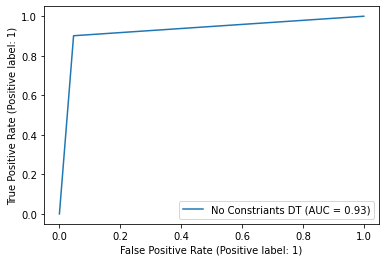

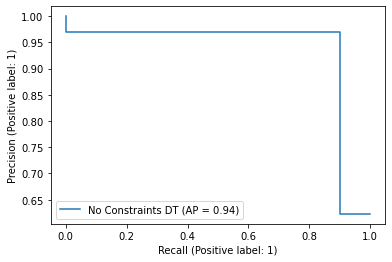

In [14]:
# Accuracy of model on test data
print("Accuracy score on test data for this model: ", accuracy_score(y_test, predict), "\n")

# Precision and Recall values
print("Precision for this model: ", precision_score(y_test, predict), "\n")
print("Recall for this model: ", recall_score(y_test, predict), "\n")

# Classification Report
print("Classification Report for this model:\n", classification_report(y_test, predict), "\n")

# Confusion Matrix
print("Confusion Matrix for this model:\n", confusion_matrix(y_test, predict), "\n")

# ROC Curve
roc_display = RocCurveDisplay.from_predictions(y_test, predict, name="No Constriants DT")


# Precision Recall Curve
pr_display = PrecisionRecallDisplay.from_predictions(y_test, predict,  
                                                   name="No Constraints DT") 

### Model 2 - Decision Tree Classifier with max_depth = 1

Accuracy score on test data for this model:  0.8947368421052632 

Precision for this model:  0.927536231884058 

Recall for this model:  0.9014084507042254 

Classification Report for this model:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.93      0.90      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114
 

Confusion Matrix for this model:
 [[38  5]
 [ 7 64]] 

ROC Curve and Precision Recall Curve



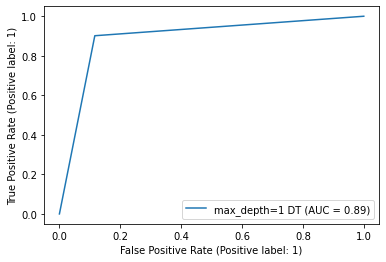

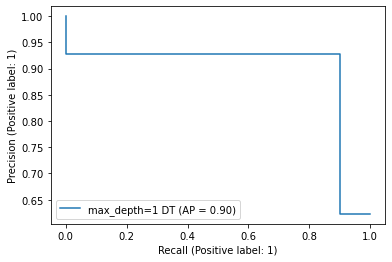

In [13]:
# Accuracy of model on test data
print("Accuracy score on test data for this model: ", accuracy_score(y_test, predict1), "\n")

# Precision and Recall values
print("Precision for this model: ", precision_score(y_test, predict1), "\n")
print("Recall for this model: ", recall_score(y_test, predict1), "\n")

# Classification Report
print("Classification Report for this model:\n", classification_report(y_test, predict1), "\n")

# Confusion Matrix
print("Confusion Matrix for this model:\n", confusion_matrix(y_test, predict1), "\n")

# ROC Curve
print("ROC Curve and Precision Recall Curve\n")
roc_display = RocCurveDisplay.from_predictions(y_test, predict1, name="max_depth=1 DT")

# Precision Recall Curve
pr_display = PrecisionRecallDisplay.from_predictions(y_test, predict1,  
                                                   name="max_depth=1 DT") 

### Comparing both the models

The dataset we took is a binary classification dataset with two classes as target classes. Coming to the comparision of results between the two models, we can see that, although the accuracy for depth 1 decision tree is less, there isn't much difference between both the models. The same goes for precision and recall.

But from the ROC curve, we can see that the number of False Positive rates reduced from depth 1 model to full range model. More data is classified correctly.